## We Rate Dogs - Data Wrangling Project
### By Assemgul Kaiyrzhan

## Step 1: Gathering Data
Gathering data is the first step in data wrangling.

1) The WeRateDogs Twitter archive. We have file twitter_archive_enhanced.csv whiche we manually added to our workspace:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy 
import json

In [66]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2) The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [67]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
image_predictions = pd.read_csv('image_predictions.tsv')

In [13]:
image_predictions.head()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [68]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3) Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count:

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [70]:
tweet_list =[]
with open('tweet_json.txt', encoding='utf-8') as file:
    for x in range(2354):
        x = file.readline()
        data = {}
        y = x.strip('{').strip('}').split(',')
        for item in y:
            if ':' in item:
                key, value = item.split(':', 1)
                data[key] = value
            else:
                pass
        favorite_count = data[' "favorite_count"']
        retweet_count = data[' "retweet_count"']
        tweet_id = data[' "id"']
        tweet_list.append({'favorite_count':int(favorite_count),
                      'retweet_count':int(retweet_count),
                      'tweet_id': tweet_id})
tweet_list

[{'favorite_count': 39467,
  'retweet_count': 8853,
  'tweet_id': ' 892420643555336193'},
 {'favorite_count': 33819,
  'retweet_count': 6514,
  'tweet_id': ' 892177421306343426'},
 {'favorite_count': 25461,
  'retweet_count': 4328,
  'tweet_id': ' 891815181378084864'},
 {'favorite_count': 42908,
  'retweet_count': 8964,
  'tweet_id': ' 891689557279858688'},
 {'favorite_count': 41048,
  'retweet_count': 9774,
  'tweet_id': ' 891327558926688256'},
 {'favorite_count': 20562,
  'retweet_count': 3261,
  'tweet_id': ' 891087950875897856'},
 {'favorite_count': 12041,
  'retweet_count': 2158,
  'tweet_id': ' 890971913173991426'},
 {'favorite_count': 56848,
  'retweet_count': 16716,
  'tweet_id': ' 890729181411237888'},
 {'favorite_count': 28226,
  'retweet_count': 4429,
  'tweet_id': ' 890609185150312448'},
 {'favorite_count': 32467,
  'retweet_count': 7711,
  'tweet_id': ' 890240255349198849'},
 {'favorite_count': 31166,
  'retweet_count': 7624,
  'tweet_id': ' 890006608113172480'},
 {'favori

In [71]:
tweet_df = pd.DataFrame()  

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['tweet_id'], tweet_list))

tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))

tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))

tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Step 2: Assessing Data
Assessing your data is the second step in data wrangling. When assessing, you're like a detective at work, inspecting your dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues):

In [37]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [34]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [40]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [41]:
tweet_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [35]:
sum(twitter_archive.duplicated())

0

In [42]:
sum(image_predictions.duplicated())

0

In [43]:
sum(tweet_df.duplicated())

1

In [44]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [54]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [55]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [63]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Buddy         7
Bailey        7
Daisy         7
Toby          7
Stanley       6
Scout         6
Leo           6
Bella         6
Jax           6
Oscar         6
Dave          6
Koda          6
Jack          6
Rusty         6
Milo          6
Alfie         5
           ... 
Tassy         1
Crimson       1
Ashleigh      1
Buckley       1
Jeb           1
Tater         1
Saydee        1
Mabel         1
Coopson       1
Sprout        1
Carll         1
Kaiya         1
Rascal        1
Sundance      1
Jim           1
Clarq         1
Rontu         1
Flurpson      1
Duchess       1
William       1
Bones         1
O             1
Ginger        1
Horace        1
Gustaf        1
Glenn         1
Aja           1
Dobby         1
Petrick       1
Gordon        1
Name: name, Length: 957,

In [57]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [58]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [64]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [65]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [66]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

## Tidiness
1) doggo, floofer, pupper, puppo need make like a one column

2) 3 dataframe join to 1 dataframe

## Quality

1) Delete some column which not needed for analysis like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and etc.

2) Have name "None", "a", "an",which start in Lowercase 

3) Change Data Type in Tweet_id, timestamp

4) rating_numerator and rating_denominator have incorrected ratings

5) rating_numerator and rating_denominator change data type

6) In Source column make one format link without html code

7) expanded_urls 2297 non-null

8) dog_rating should be integers, not floats

## Step 3: Cleaning Data
Cleaning your data is the third step in data wrangling. It is where you fix the quality and tidiness issues that you identified in the assess step.

In [85]:
archive_clean = twitter_archive.copy()
prediction_clean = image_predictions.copy()
tweet_clean = tweet_df.copy()

### Tidiness 1 - doggo, floofer, pupper, puppo need make like a one column

### Code

In [86]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

### Test

In [87]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN


In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     38

### Tidiness 2 - 2 dataframe join to 1 dataframe

### Code

### So we need resolve first quality issues with tweet_id in tweet_df change to int data type

In [89]:
tweet_clean["tweet_id"]= tweet_clean["tweet_id"].astype(int) 

In [90]:
df_dog = pd.merge(archive_clean, image_predictions,on='tweet_id', how='inner')
df_dog = pd.merge(df_dog, tweet_clean,on='tweet_id', how='inner')

### Test

In [15]:
df_dog.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Quality 1 - Delete some column which not needed for analysis 
### Code

In [91]:
df_dog = df_dog.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
df_dog = df_dog.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


### Test

In [92]:
df_dog.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


In [93]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 22 columns):
tweet_id              2115 non-null int64
timestamp             2115 non-null object
source                2115 non-null object
text                  2115 non-null object
expanded_urls         2115 non-null object
rating_numerator      2115 non-null int64
rating_denominator    2115 non-null int64
name                  2115 non-null object
dog_stage             333 non-null object
jpg_url               2115 non-null object
img_num               2115 non-null int64
p1                    2115 non-null object
p1_conf               2115 non-null float64
p1_dog                2115 non-null bool
p2                    2115 non-null object
p2_conf               2115 non-null float64
p2_dog                2115 non-null bool
p3                    2115 non-null object
p3_conf               2115 non-null float64
p3_dog                2115 non-null bool
retweet_count         2115 non-null int64

### Quality 2 - Have name "None", "a", "an" and etc.,which start in Lowercase

### Code

In [94]:
lowercase_letters = [c for c in df_dog['name'] if c.islower()]

In [95]:
print(lowercase_letters)

['such', 'a', 'quite', 'quite', 'quite', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'a', 'just', 'just', 'getting', 'very', 'this', 'unacceptable', 'all', 'a', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'an', 'a', 'a', 'very', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [96]:
import numpy as np
df_dog['name'].replace(lowercase_letters, 'None', inplace = True)

### Test

In [97]:
df_dog.name.value_counts()

None        674
Cooper       11
Charlie      11
Oliver       11
Penny        10
Lucy         10
Lola          9
Winston       9
Tucker        9
Bo            9
Sadie         8
Buddy         7
Daisy         7
Toby          7
Bella         6
Dave          6
Scout         6
Stanley       6
Koda          6
Bailey        6
Rusty         6
Leo           6
Milo          6
Jax           6
Jack          6
Finn          5
George        5
Sunny         5
Larry         5
Louis         5
           ... 
Covach        1
Carbon        1
Griswold      1
Trigger       1
Storkson      1
Loomis        1
Mona          1
Saydee        1
Thor          1
Dido          1
Dante         1
Clarq         1
Arnold        1
Malikai       1
Bert          1
Kona          1
Arlen         1
Clybe         1
Hermione      1
Traviss       1
Butters       1
Vince         1
Tess          1
Cecil         1
Clifford      1
Farfle        1
Dylan         1
BeBe          1
Cermet        1
Tom           1
Name: name, Length: 906,

### Quality 3 - Change Data Type in Tweet_id and timestamp

### Code

In [98]:
df_dog['tweet_id'] = df_dog['tweet_id'].astype(str) 
df_dog['timestamp']= pd.to_datetime(df_dog['timestamp'],format = "%Y-%m-%d %H:%M:%S") 

### Test

In [99]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 22 columns):
tweet_id              2115 non-null object
timestamp             2115 non-null datetime64[ns]
source                2115 non-null object
text                  2115 non-null object
expanded_urls         2115 non-null object
rating_numerator      2115 non-null int64
rating_denominator    2115 non-null int64
name                  2115 non-null object
dog_stage             333 non-null object
jpg_url               2115 non-null object
img_num               2115 non-null int64
p1                    2115 non-null object
p1_conf               2115 non-null float64
p1_dog                2115 non-null bool
p2                    2115 non-null object
p2_conf               2115 non-null float64
p2_dog                2115 non-null bool
p3                    2115 non-null object
p3_conf               2115 non-null float64
p3_dog                2115 non-null bool
retweet_count         2115 non-n

### Quality 4 - rating_numerator and rating_denominator have incorrected Data type

### Code

In [100]:
df_dog['rating_numerator'] = df_dog['rating_numerator'].astype(int)
df_dog['rating_denominator'] = df_dog['rating_denominator'].astype(float)

### Test

In [101]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 22 columns):
tweet_id              2115 non-null object
timestamp             2115 non-null datetime64[ns]
source                2115 non-null object
text                  2115 non-null object
expanded_urls         2115 non-null object
rating_numerator      2115 non-null int64
rating_denominator    2115 non-null float64
name                  2115 non-null object
dog_stage             333 non-null object
jpg_url               2115 non-null object
img_num               2115 non-null int64
p1                    2115 non-null object
p1_conf               2115 non-null float64
p1_dog                2115 non-null bool
p2                    2115 non-null object
p2_conf               2115 non-null float64
p2_dog                2115 non-null bool
p3                    2115 non-null object
p3_conf               2115 non-null float64
p3_dog                2115 non-null bool
retweet_count         2115 non

### Quality 5 - rating_numerator and rating_denominator have incorrected ratings

### Code

In [102]:
df_dog['dog_rating'] = 10 * df_dog['rating_numerator'] / df_dog['rating_denominator']

### Test

In [103]:
df_dog.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,12.0


### Code

In [104]:
df_dog = df_dog.drop(['rating_numerator','rating_denominator'], axis=1)

### Test

In [105]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 21 columns):
tweet_id          2115 non-null object
timestamp         2115 non-null datetime64[ns]
source            2115 non-null object
text              2115 non-null object
expanded_urls     2115 non-null object
name              2115 non-null object
dog_stage         333 non-null object
jpg_url           2115 non-null object
img_num           2115 non-null int64
p1                2115 non-null object
p1_conf           2115 non-null float64
p1_dog            2115 non-null bool
p2                2115 non-null object
p2_conf           2115 non-null float64
p2_dog            2115 non-null bool
p3                2115 non-null object
p3_conf           2115 non-null float64
p3_dog            2115 non-null bool
retweet_count     2115 non-null int64
favorite_count    2115 non-null int64
dog_rating        2115 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
mem

### Quality 6 - In Source column make one format link without html code
### Code

In [106]:
df_dog['source'] = df_dog['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [107]:
df_dog.source.value_counts()

Twitter for iPhone    2075
Twitter Web Client      28
TweetDeck               12
Name: source, dtype: int64

### Quality 7 - expanded_urls 2297 non-null
### Code 

In [108]:
df_dog = df_dog[df_dog.expanded_urls.notnull()]

### Test

In [109]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 21 columns):
tweet_id          2115 non-null object
timestamp         2115 non-null datetime64[ns]
source            2115 non-null object
text              2115 non-null object
expanded_urls     2115 non-null object
name              2115 non-null object
dog_stage         333 non-null object
jpg_url           2115 non-null object
img_num           2115 non-null int64
p1                2115 non-null object
p1_conf           2115 non-null float64
p1_dog            2115 non-null bool
p2                2115 non-null object
p2_conf           2115 non-null float64
p2_dog            2115 non-null bool
p3                2115 non-null object
p3_conf           2115 non-null float64
p3_dog            2115 non-null bool
retweet_count     2115 non-null int64
favorite_count    2115 non-null int64
dog_rating        2115 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
mem

### Quality 8 - dog_rating should be integers, not floats
### Code

In [110]:
df_dog["dog_rating"]= df_dog["dog_rating"].astype(int) 

### Test

In [112]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2114
Data columns (total 21 columns):
tweet_id          2115 non-null object
timestamp         2115 non-null datetime64[ns]
source            2115 non-null object
text              2115 non-null object
expanded_urls     2115 non-null object
name              2115 non-null object
dog_stage         333 non-null object
jpg_url           2115 non-null object
img_num           2115 non-null int64
p1                2115 non-null object
p1_conf           2115 non-null float64
p1_dog            2115 non-null bool
p2                2115 non-null object
p2_conf           2115 non-null float64
p2_dog            2115 non-null bool
p3                2115 non-null object
p3_conf           2115 non-null float64
p3_dog            2115 non-null bool
retweet_count     2115 non-null int64
favorite_count    2115 non-null int64
dog_rating        2115 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(10)
memor

## Storing Data

In [113]:
df_dog.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [114]:
df_archive = pd.read_csv('twitter_archive_master.csv')
df_archive.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,13
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,13
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,12
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,13
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,12


In [115]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 21 columns):
tweet_id          2115 non-null int64
timestamp         2115 non-null object
source            2115 non-null object
text              2115 non-null object
expanded_urls     2115 non-null object
name              2115 non-null object
dog_stage         333 non-null object
jpg_url           2115 non-null object
img_num           2115 non-null int64
p1                2115 non-null object
p1_conf           2115 non-null float64
p1_dog            2115 non-null bool
p2                2115 non-null object
p2_conf           2115 non-null float64
p2_dog            2115 non-null bool
p3                2115 non-null object
p3_conf           2115 non-null float64
p3_dog            2115 non-null bool
retweet_count     2115 non-null int64
favorite_count    2115 non-null int64
dog_rating        2115 non-null int64
dtypes: bool(3), float64(3), int64(5), object(10)
memory usage: 303.7+ KB


In [116]:
df_archive.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,dog_rating
count,2.115000e+03,2115.000000,2115.000000,2.115000e+03,2.115000e+03,2115.000000,2115.000000,2115.000000
mean,7.376745e+17,1.207565,0.596030,1.351065e-01,6.007979e-02,3201.994799,8322.602364,11.714894
std,6.746527e+16,0.569602,0.270620,1.013779e-01,5.092956e-02,5341.086886,12048.734288,39.515030
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000,0.000000
25%,6.764355e+17,1.000000,0.367655,5.370120e-02,1.594050e-02,666.500000,1468.000000,10.000000
50%,7.113067e+17,1.000000,0.588230,1.186470e-01,4.921790e-02,1511.000000,3711.000000,11.000000
75%,7.904598e+17,1.000000,0.846807,1.968950e-01,9.180755e-02,3677.500000,10487.500000,12.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,1776.000000


### 1 insights. In these graphs, we can view a general picture of all the counts that we have. Let's pay attention to favorites and retweets.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4325491630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f43251f59b0>]], dtype=object)

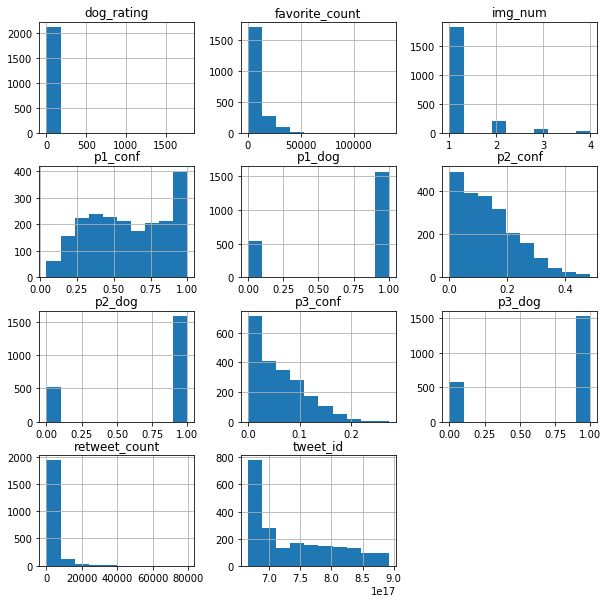

In [117]:
df_archive.hist(figsize=(10,10))

### 2 insights. Let's see TOP 5 more Favorite tweets 

In [118]:
df_archive.sort_values(['favorite_count'], ascending =False ).head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating
330,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810,13
856,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,...,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075,13
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,...,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,45849,107956,13
435,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625,107015,13
113,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,...,True,Boston_bull,0.078060,True,pug,0.001771,True,32883,106827,13


### 3 insights. Let's see TOP 5 retweets

In [119]:
df_archive.sort_values(['retweet_count'], ascending =False ).head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_rating
856,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,...,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075,13
434,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625,0,13
435,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625,107015,13
896,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,52360,0,13
897,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,52360,75163,13


We can see that there are two tweets in favorites and retweets, which have both a high favorite and retweets:
744234799360020481 and 807106840509214720 

### 4 insights. Let's see TOP Dog kinds

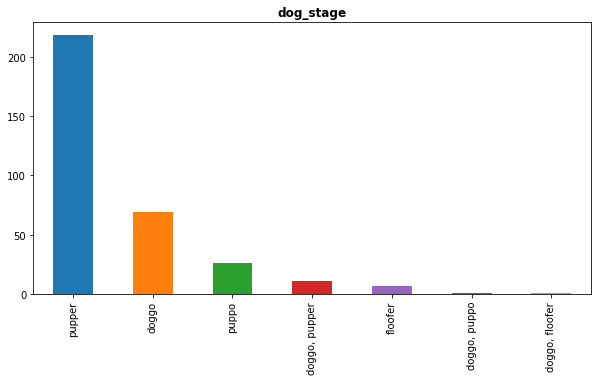

In [121]:
df_archive['dog_stage'].value_counts().plot(kind='bar', figsize=(10,5));
plt.title('dog_stage', weight='bold', fontsize=12);

In [122]:
df_archive['dog_stage'].value_counts()

pupper            218
doggo              69
puppo              26
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

Pupper (239) is the most common stage in a dog's life for this analysis.
pupper     239
doggo       78
puppo       32
floofer      3

In [123]:
df_archive.sort_values('favorite_count')['dog_stage']

1180              NaN
593             puppo
1866              NaN
883               NaN
589               NaN
661               NaN
261            pupper
1452              NaN
585             doggo
267               NaN
881            pupper
582               NaN
274               NaN
658               NaN
1446           pupper
282               NaN
576               NaN
876     doggo, pupper
286               NaN
289             doggo
570               NaN
671               NaN
566               NaN
867               NaN
1215              NaN
1567           pupper
558               NaN
579               NaN
680             doggo
597               NaN
            ...      
2051              NaN
447               NaN
357             doggo
49             pupper
48                NaN
115               NaN
715               NaN
103               NaN
489             doggo
317             puppo
7                 NaN
366               NaN
292               NaN
1530              NaN
130       

In [124]:
df_archive.sort_values('favorite_count')['name']

1180        None
593         None
1866       Paull
883         None
589         None
661         Fizz
261       Gidget
1452       Carly
585      Sampson
267      Charlie
881        Baloo
582        Penny
274         None
658        Davey
1446          Bo
282        Lilly
576         Dave
876         None
286          Leo
289       Astrid
570        Riley
671        Klein
566        Rusty
867         Bell
1215        Beau
1567        None
558       Mattie
579         Cali
680       Gerald
597     Hercules
          ...   
2051       Pipsy
447           Bo
357        Sunny
49          None
48          Gary
115         Coco
715         None
103       Walter
489         None
317         None
7           None
366        Buddy
292       Dexter
1530        None
130         None
1589     Kenneth
33          Earl
22        Canela
66           Aja
283        Lilly
897         None
143         None
438         None
95          Zoey
359           Bo
113       Jamesy
435      Stephan
57       Duddl

### 5 insights. Top 5 Dog Predictions

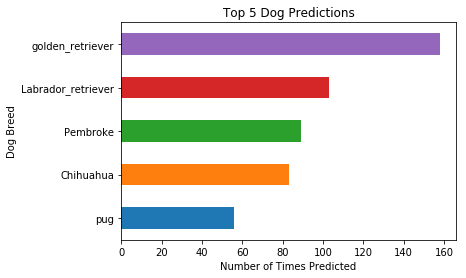

In [95]:
df_archive['p1'].value_counts()[4::-1].plot(kind='barh')
plt.title('Top 5 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12

In [105]:
df_archive['p1'].value_counts()

golden_retriever             158
Labrador_retriever           103
Pembroke                      89
Chihuahua                     83
pug                           56
chow                          45
Samoyed                       44
toy_poodle                    42
Pomeranian                    41
French_bulldog                32
malamute                      30
cocker_spaniel                30
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     22
Eskimo_dog                    21
Staffordshire_bullterrier     21
Cardigan                      21
German_shepherd               20
Siberian_husky                20
Maltese_dog                   18
teddy                         18
beagle                        18
Shih-Tzu                      18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        17
Italian_greyhound             16
web_site                      16
          

We can see from this graph that golden_retriever (158) and Labrador_retriever (103) are especially popular.

### 6 insights. Top 5 Dog Name

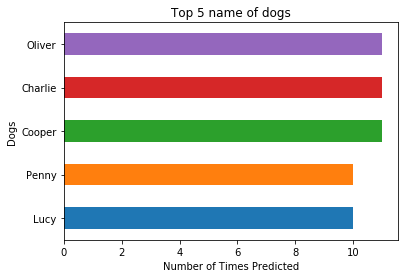

In [129]:
df_archive['name'].value_counts()[4::-1].plot(kind='barh')
plt.title('Top 5 name of dogs')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dogs')
plt.fontsize = 12

In [106]:
df_archive['name'].value_counts()

Cooper       11
Charlie      11
Oliver       11
Lucy         10
Penny        10
Lola          9
Winston       9
Bo            9
Tucker        9
Sadie         8
Daisy         7
Buddy         7
Toby          7
Milo          6
Scout         6
Koda          6
Jax           6
Stanley       6
Leo           6
Bella         6
Dave          6
Jack          6
Rusty         6
Bailey        6
Oakley        5
Alfie         5
Sunny         5
Chester       5
George        5
Larry         5
             ..
Jersey        1
Champ         1
Lolo          1
Pawnd         1
Spencer       1
Kanu          1
Ike           1
Furzey        1
Sunshine      1
Alexander     1
Alfy          1
Franq         1
Skittles      1
Kota          1
Pilot         1
Bloo          1
Noah          1
Clarq         1
Lassie        1
Brockly       1
Brandi        1
Sky           1
Major         1
Georgie       1
Baron         1
Tommy         1
Barney        1
Joey          1
Pancake       1
Grizzwald     1
Name: name, Length: 905,

We have 3 dogs with the same high performance - Cooper, Charlie and Oliver (11)

### 7 insights. Favorites and Retweets

AttributeError: module 'seaborn' has no attribute 'plt'

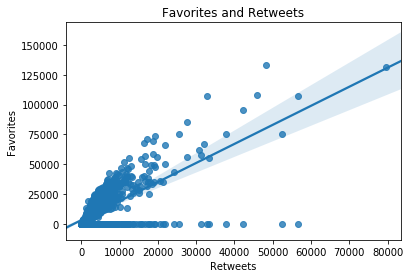

In [102]:
p = sns.regplot(x=df_archive.retweet_count, y=df_archive.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
sns.plt.show()
fig = p.get_figure()
fig.savefig('scatterplot.png')

There is a strong connection between retweets and favorites. When a tweet gets Favorites, you can expect an increase in retweets and vice versa.